# Test of neural network
By: Magnus Kvåle Helliesen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neural_network.neural_network import NeuralNetwork

## Setting up a random neural network

In [2]:
nn = NeuralNetwork(100, 100, 2, 2)

## Testing if it learns from only updating the output layer

In [3]:
# Generating a random input array
array1 = np.linspace(0, 1, 100)
array2 = np.linspace(1, 0, 100)

In [4]:
# Without training the neural network does not know how that maps to an output
nn.predict(array1)

array([0.48007423, 0.51992577])

In [5]:
nn.predict(array2)

array([0.48008419, 0.51991581])

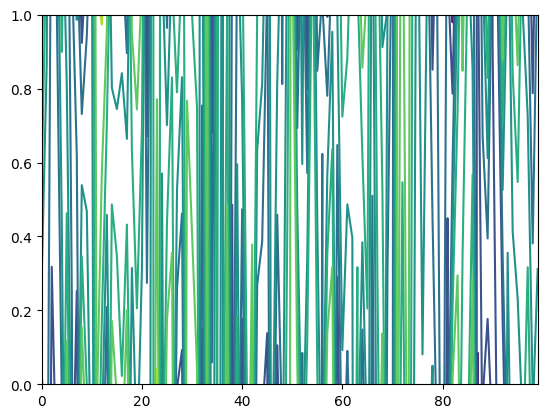

In [6]:
plt.contour(nn.weights[2])

In [7]:
# Making two types of data with some noise
type1_data = tuple(((array1+np.random.normal(size=100)/3, np.array([1, 0])) for _ in range(100)))
type2_data = tuple(((array2+np.random.normal(size=100)/3, np.array([0, 1])) for _ in range(100)))
data = (*type1_data, *type2_data)

In [8]:
# Let's train it
for _ in range(50):
    nn.train(data, 0.01)

/home/magnus/Python/neural-network/neural_network/neural_network.py:103: RuntimeWarning: overflow encountered in exp
  return np.exp(x)/np.exp(x).sum()
/home/magnus/Python/neural-network/neural_network/neural_network.py:103: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x)/np.exp(x).sum()


/home/magnus/anaconda3/envs/magnus/lib/python3.9/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/magnus/anaconda3/envs/magnus/lib/python3.9/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


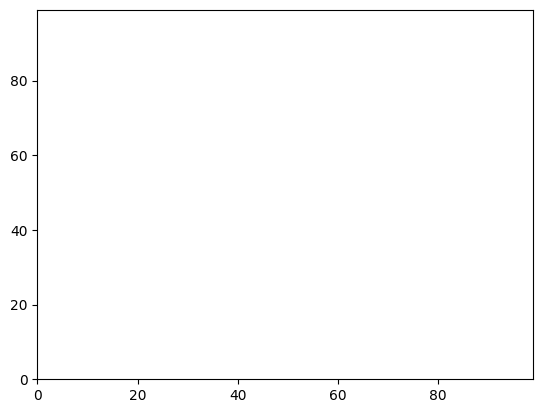

In [9]:
plt.contour(nn.weights[1])

In [10]:
# It already shows improvement
nn.predict(array1)

array([nan, nan])

In [11]:
nn.predict(array2)

array([nan, nan])

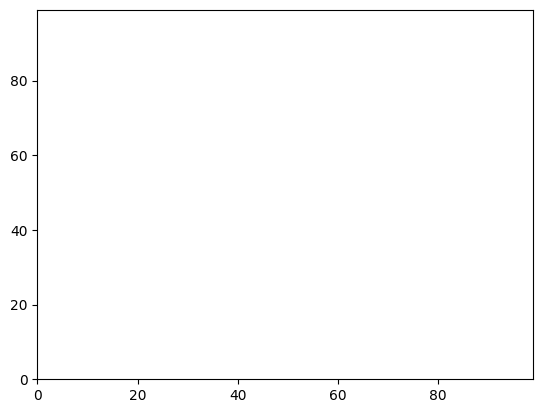

In [12]:
plt.contour(nn.weights[1]-nn._weights0[1])